In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

## 1. Load the Data

### 1.1 Load the Data

In [2]:
df=pd.read_csv('../data/us_disaster_declarations.csv')

### 1.2 Inspect the Data

In [4]:
df.head()

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,incident_end_date,disaster_closeout_date,fips,place_code,designated_area,declaration_request_number,last_ia_filing_date,last_refresh,hash,id
0,DR-1-GA,1,GA,DR,1953-05-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-05-02T00:00:00Z,1954-06-01T00:00:00Z,13000,0,Statewide,53013,NaN,2023-03-18T13:22:03Z,48af1afcc4535aa910ddb5b85eebe047dc703a6b,da5c8f17-c28f-4c41-8e06-fa8efc85aa4a
1,DR-2-TX,2,TX,DR,1953-05-15T00:00:00Z,1953,Tornado,Tornado & Heavy Rainfall,0,1,...,1953-05-15T00:00:00Z,1958-01-01T00:00:00Z,48000,0,Statewide,53003,NaN,2023-03-18T13:22:03Z,6bbba411d294ec521683e36313c8da2992e8a857,b0b41f55-0d77-43ac-898c-3cc4a18231e6
2,DR-3-LA,3,LA,DR,1953-05-29T00:00:00Z,1953,Flood,Flood,0,1,...,1953-05-29T00:00:00Z,1960-02-01T00:00:00Z,22000,0,Statewide,53005,NaN,2023-03-18T13:22:03Z,5b2fa18b404bdcf0d3038cd17f1aa995d5412f48,9fd9401d-c76c-43c3-b42a-6a4ae5139ec0
3,DR-4-MI,4,MI,DR,1953-06-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-06-02T00:00:00Z,1956-02-01T00:00:00Z,26000,0,Statewide,53004,NaN,2023-03-18T13:22:03Z,403164346eb22263810402e8b67f1712f1574ad5,67324f38-1f00-4bbc-aeda-5194d1befad6
4,DR-5-MT,5,MT,DR,1953-06-06T00:00:00Z,1953,Flood,Floods,0,1,...,1953-06-06T00:00:00Z,1955-12-01T00:00:00Z,30000,0,Statewide,53006,NaN,2023-03-18T13:22:03Z,8c775d2ce843a8eba2417f9716ba5c75fe0e53f3,e3853916-c7a2-4557-ad8e-60a42d369a61


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64092 entries, 0 to 64091
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   fema_declaration_string     64092 non-null  object
 1   disaster_number             64092 non-null  int64 
 2   state                       64092 non-null  object
 3   declaration_type            64092 non-null  object
 4   declaration_date            64092 non-null  object
 5   fy_declared                 64092 non-null  int64 
 6   incident_type               64092 non-null  object
 7   declaration_title           64092 non-null  object
 8   ih_program_declared         64092 non-null  int64 
 9   ia_program_declared         64092 non-null  int64 
 10  pa_program_declared         64092 non-null  int64 
 11  hm_program_declared         64092 non-null  int64 
 12  incident_begin_date         64092 non-null  object
 13  incident_end_date           55682 non-null  ob

In [6]:
df.describe()

,disaster_number,fy_declared,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,fips,place_code,declaration_request_number
count,64092.000000,64092.000000,64092.000000,64092.000000,64092.000000,64092.000000,64092.000000,64092.000000,64092.000000
mean,2577.105364,2004.339996,0.168087,0.268161,0.932035,0.431489,31705.675638,96373.283733,35025.917306
std,1405.535733,14.785293,0.373946,0.443006,0.251687,0.495288,16642.418797,13940.282164,34956.137681
min,1.000000,1953.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,3.000000
25%,1316.000000,1997.000000,0.000000,0.000000,1.000000,0.000000,19183.000000,99029.000000,8151.000000
50%,3057.000000,2007.000000,0.000000,0.000000,1.000000,0.000000,30036.000000,99071.000000,20026.000000
75%,3546.000000,2018.000000,0.000000,1.000000,1.000000,1.000000,46075.000000,99123.000000,74028.000000
max,5457.000000,2023.000000,1.000000,1.000000,1.000000,1.000000,78030.000000,99507.000000,99159.000000


### 1.3 Clean the Data
- remove unneeded columns
- remove extra states/territories

### 1.4 Regularize Time Axis (Monthly)

In [16]:
# Convert 'declaration_date' obj to dtm in new 'declaration_dtm' column
df['declaration_dtm']=pd.to_datetime(df['declaration_date'], format='%Y-%m-%dT%H:%M:%SZ')

df.head()

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,place_code,designated_area,declaration_request_number,last_ia_filing_date,last_refresh,hash,id,declaration_dtm,yr_mo,declaration_yr_mo
0,DR-1-GA,1,GA,DR,1953-05-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,0,Statewide,53013,NaN,2023-03-18T13:22:03Z,48af1afcc4535aa910ddb5b85eebe047dc703a6b,da5c8f17-c28f-4c41-8e06-fa8efc85aa4a,1953-05-02,1953-05,1953-05
1,DR-2-TX,2,TX,DR,1953-05-15T00:00:00Z,1953,Tornado,Tornado & Heavy Rainfall,0,1,...,0,Statewide,53003,NaN,2023-03-18T13:22:03Z,6bbba411d294ec521683e36313c8da2992e8a857,b0b41f55-0d77-43ac-898c-3cc4a18231e6,1953-05-15,1953-05,1953-05
2,DR-3-LA,3,LA,DR,1953-05-29T00:00:00Z,1953,Flood,Flood,0,1,...,0,Statewide,53005,NaN,2023-03-18T13:22:03Z,5b2fa18b404bdcf0d3038cd17f1aa995d5412f48,9fd9401d-c76c-43c3-b42a-6a4ae5139ec0,1953-05-29,1953-05,1953-05
3,DR-4-MI,4,MI,DR,1953-06-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,0,Statewide,53004,NaN,2023-03-18T13:22:03Z,403164346eb22263810402e8b67f1712f1574ad5,67324f38-1f00-4bbc-aeda-5194d1befad6,1953-06-02,1953-06,1953-06
4,DR-5-MT,5,MT,DR,1953-06-06T00:00:00Z,1953,Flood,Floods,0,1,...,0,Statewide,53006,NaN,2023-03-18T13:22:03Z,8c775d2ce843a8eba2417f9716ba5c75fe0e53f3,e3853916-c7a2-4557-ad8e-60a42d369a61,1953-06-06,1953-06,1953-06


In [26]:
# Create resampled_df containing 'state', 'declaration_dtm', and 'incident_type'
resampled_df=(df.assign(date=lambda d: pd.to_datetime(d['declaration_dtm'], format="%Y-%m-%d"))[['state', 'declaration_dtm', 'incident_type']])

# Set index to declaration_dtm, group by 'state', and sum the monthly (ME) incidents
resampled_df.set_index('declaration_dtm').groupby('state').resample('ME').sum().head()

state incident_type
state declaration_dtm                    
AK    1953-10-31         AK         Other
      1953-11-30          0             0
      1953-12-31          0             0
      1954-01-31          0             0
      1954-02-28          0             0

In [27]:
# Check if dtm axis is regular - take the difference across the dtm index
diff=np.diff(resampled_df.index.to_numpy())

# Check that all of the differences are equal
equally_spaced=np.all(diff==diff[0])

print(f'Datetime axis is regular: {equally_spaced}')

Datetime axis is regular: True


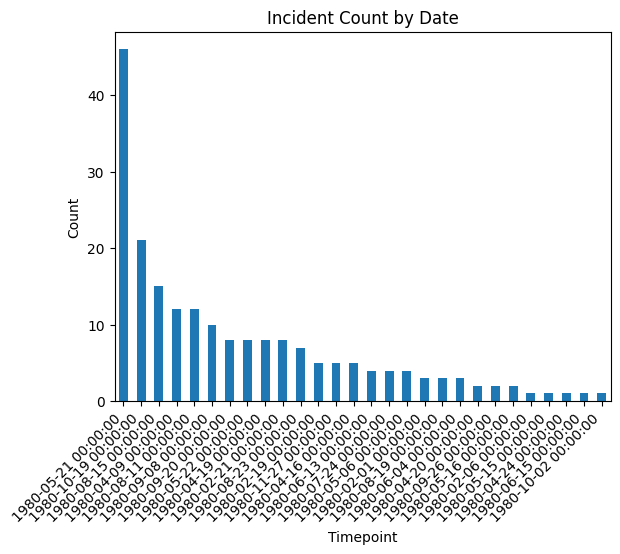

In [29]:
# Check time axis in a plot (for year 1980 only)
year = resampled_df[resampled_df['declaration_dtm'].dt.strftime('%Y')=='1980']
counts = year['declaration_dtm'].value_counts()

counts.plot(kind='bar')
plt.title('Incident Count by Date')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Timepoint')
plt.ylabel('Count')
plt.show()